# HOW2 

The following notebook will walk you through some basic python that will help you create triangles and graphs.
Make sure you **run all of the code blocks in the order they appear** in this notebook, as they can depend on each other.
I have tried to make the variable names as self explanatory as possible.

If a line starts with #, then it is a comment and will explain the code it surrounds.


## Imports
In the cell below, all that is happening is we are importing the packages we will be using in this tutorial 

In [212]:
%matplotlib inline
import matplotlib
#from tabulate import tabulate
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Where we have written e.g. ```import matplotlib.pyplot as plt``` all this means is we are importing it and renaming it under an alias we choose. This just makes our lives easier as when we want to call the function, we can just type ```plt``` instead of
the entire ```matplotlib.pyplot```

The ```%matplotlib inline``` allows us to view the graphs in this notebook

# Gross Premiums Received

In the section below, we will create triangles and graphs relating to the 'Gross Premiums Received' from the data in the data.csv file.

## Reading from a .csv File

In the cell below, we are reading the data in the claims.csv file into a DataFrame (using the ```pd.read_csv(FILENAME)``` function). A DataFrame is basically just a spreadsheet. You can name the DataFrame anything, in this example, we have chosen the variable name df.

We don't want commas to be polluting our numbers so, to remove them, use ```df = df.replace(',','', regex = True)``` where the ```regex = True``` option will also replace commas inside substrings

I'm also going to convert the "Processing Month" column to type string, so it is subscriptable. This will be useful in a later exercise

The ```display(df)``` command will print a pretty table displaying the DataFrame.

In [213]:
df = pd.read_csv('claims.csv')

df.replace(',','', regex = True, inplace=True)

# here we just change the pandas settings so we can see all the rows in the tables. You can change it if you would like. 
# see what happens when you change None to 4 (make sure to change it back afterwards for the rest of the tutorial)
pd.set_option("display.max_rows", None)

# I am converting this column to type string so i can do string slicing on it later
df['Processing Month'] = df['Processing Month'].astype('str')

#I am converting the Gross Premiums Received, Gross Paid Claims, Gross Incurred Claims columns to integer
df[['Gross Premiums Received', 'Gross Paid Claims', 'Gross Incurred Claims']] = df[['Gross Premiums Received', 'Gross Paid Claims', 'Gross Incurred Claims']].astype('int')

display(df)

# an alternative to display() is print(tabulate(df, headers = 'keys', tablefmt = 'pretty')), if you want to use it, uncomment
# it in the imports and install it on your machine

,Underwriting YoA,Processing Month,Gross Premiums Received,Gross Paid Claims,Gross Incurred Claims
0,2013,201301,322983,0,0
1,2013,201302,5083516,112500,112500
2,2013,201303,8812441,124813,183023
3,2013,201304,12751060,153152,259558
4,2013,201305,13346743,199386,509828
5,2013,201306,15993573,371695,759277
6,2013,201307,17618810,558040,1115204
7,2013,201308,20333060,967848,1832746
8,2013,201309,22002371,1277353,3068456
9,2013,201310,23991350,2625446,7017086


# Displaying a triangle

We will be using a built in pandas function to create our triangles. 

# Gross Premiums Received

We want to create a pivot table with the Underwriting YoA against the Development period. 

## Finding the development periods
The development period values are held in another column in our DataFrame, but as an extra challenge, lets instead infer it from the processing months.
Lets find the development period using vector calculations. The formula we want to use is: (Processing year - Underwriting YoA) *12 + Processing month

We can start by splitting Processing Month into two columns: Processing Year and Processing Month.

In [214]:
# creating a DataFrame with the 3 columns we will need
vec_gross_prems_piv= df[['Underwriting YoA','Processing Month','Gross Premiums Received']].copy()

# making'Processing Month' into 2 columns: 'Processing Month' and 'Processing Year'
# using a built in function str to string slice every value in column aand then converting it to integers again
# so we can use the values in our calculations
vec_gross_prems_piv['Processing Year'] = vec_gross_prems_piv['Processing Month'].str[:4].astype('int')
vec_gross_prems_piv['Processing Month'] = vec_gross_prems_piv['Processing Month'].str[4:6].astype('int')

#using our formula to create a list containing the development periods
dev_period = []
dev_period = (vec_gross_prems_piv['Processing Year']-vec_gross_prems_piv['Underwriting YoA'])*12 + vec_gross_prems_piv['Processing Month']
vec_gross_prems_piv['Development period'] = dev_period

## Create a Triangle using Pivot Tables

We can now create the triangle from our DataFrame using the [pd.pivot_table function](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html). We will also insert a "Grand Total" row and column.

the ```margins = True``` inserts a Totals row and column using the ```margins_name = 'Grand Total'``` as the titles.

In [215]:
table_gross_prems = pd.pivot_table(vec_gross_prems_piv, values='Gross Premiums Received', index=['Underwriting YoA'],
                    columns=['Development period'],aggfunc= {"Gross Premiums Received":np.sum} ,margins = True, 
                    margins_name = 'Grand Total')

display(table_gross_prems)

Development period,1,2,3,4,5,6,7,8,9,10,...,50,51,52,53,54,55,56,57,60,Grand Total
Underwriting YoA,,,,,,,,,,,,,,,,,,,,,
2013,322983.0,5083516.0,8812441.0,12751060.0,13346743.0,15993573.0,17618810.0,20333060.0,22002371.0,23991350.0,...,53591945.0,53596927.0,53385656.0,53515182.0,53510028.0,53520400.0,53440068.0,53439639.0,53310131.0,2521425893
2014,429263.0,3664094.0,9070001.0,9807319.0,12577434.0,14233825.0,17366342.0,19848826.0,22048733.0,24676600.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1748297800
2015,273587.0,6350506.0,7990355.0,9695011.0,12016329.0,13445556.0,15882387.0,18896115.0,20951776.0,23468360.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1097316582
2016,188806.0,4992894.0,6578719.0,8802753.0,10685937.0,12302122.0,16527614.0,18590920.0,25479747.0,22452988.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,546597547
2017,323277.0,4745863.0,6467620.0,7249042.0,9699436.0,12050793.0,14246337.0,18118460.0,19887995.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119520458
Grand Total,1537916.0,24836873.0,38919136.0,48305185.0,58325879.0,68025869.0,81641490.0,95787381.0,110370622.0,94589298.0,...,53591945.0,53596927.0,53385656.0,53515182.0,53510028.0,53520400.0,53440068.0,53439639.0,53310131.0,6033158280


## Displaying Graphs

In this next section we will display the Gross Premiums as a graph similar to this (we won't let it drop down):
![](Gross_premiums_graph_example.png)

### Plot the graph

If you use ```df.plot.line()``` it plots all the numerical columns as separate lines. We can't just straight away plot the pivot table using .plot.line() because it will plot the wrong indexes, we want to transpose it first. If you want further explanation, read the [documentation for .plot.line()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.line.html).    

We will use our pivot table, but we will first remove the "Grand Total" from the column and row.

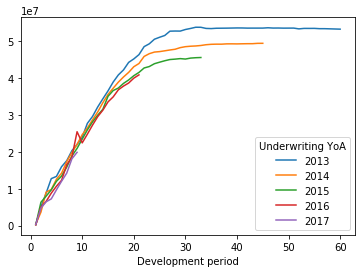

In [216]:
# remove the Totals columns 
table_gross_prems.drop('Grand Total', inplace=True, axis = 1)
table_gross_prems.drop('Grand Total', inplace=True, axis = 0)

# plot the graph
ax = table_gross_prems.transpose().plot.line()


# "print" the graph
plt.show()

### Add the axis labels, etc

You may want to clean up the graph a bit by adding axes labels and a title.  
It might also be worth changing the settings so all your graphs appear bigger.  
You may also want to be able to save the graph as an image.  
If you are struggling with this, or want to know more, the [matplotlib documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html) will help, and so will the [pandas.DataFrame.plot documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html).

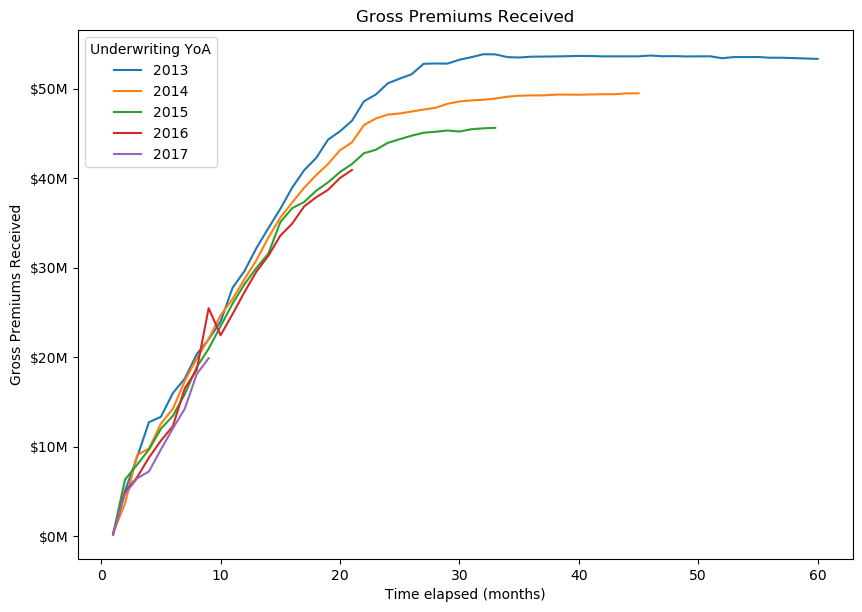

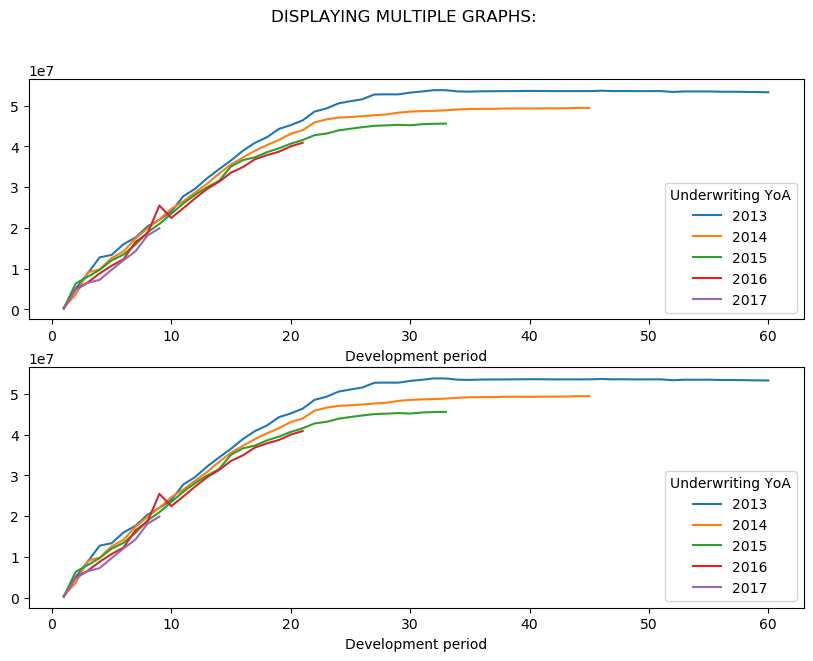

In [217]:
# makes our graph a little bit bigger
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize']=(10, 7)

# plot our DataFrame  
ax = table_gross_prems.transpose().plot.line()

# create axes labels and title the graph
ax.set(xlabel='Time elapsed (months)', ylabel='Gross Premiums Received', title='Gross Premiums Received')

#If you want to display the y axis as $50M, you can create a function to do this (we can then call this later on)
def yaxisFormatting(x, y):
    return str('${:.0f}'.format(x/1000000) +'M')
                                      
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(yaxisFormatting))

# If you want to display the y axis in the form $50,000,000, comment out the line above and uncomment the line below
#plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))

# this will save the graph as an image, search in the directory you are in and open it
plt.savefig('gross_prem_graph.png')

# if you wanted to plot multiple graphs in the same figure, this is also possible 
# if you wanted to display the graphs as next to each other, change fig, axes = plt.subplots(1,2)
fig1, axes = plt.subplots(2)

#setting a figure title
fig1.suptitle('DISPLAYING MULTIPLE GRAPHS:')

# im just plotting the same graph twice. If you want to plot different ones, change a table_gross_prems.transpose() to the name of a different DataFrame
table_gross_prems.transpose().plot(ax= axes[0]) 
table_gross_prems.transpose().plot(ax= axes[1]) 

# "print" the graphs
plt.show()

# Gross Incurred Claims

Lets repeat the process for Gross Incurred Claims. We already worked out the development period, so we can just append it to the DataFrame.

In [218]:
# create a DataFrame with the colums we need
gross_inc_piv= df[['Underwriting YoA','Processing Month','Gross Incurred Claims']].copy()

# create a new column containing the development periods
gross_inc_piv['Development period'] = dev_period

# create our pivot table
table_gross_inc = pd.pivot_table(gross_inc_piv, values='Gross Incurred Claims', index=['Underwriting YoA'],
                  columns=['Development period'],aggfunc= {"Gross Incurred Claims":np.sum} ,margins = True, 
                    margins_name = 'Grand Total')

display(table_gross_inc)

Development period,1,2,3,4,5,6,7,8,9,10,...,50,51,52,53,54,55,56,57,60,Grand Total
Underwriting YoA,,,,,,,,,,,,,,,,,,,,,
2013,0.0,112500.0,183023.0,259558.0,509828.0,759277.0,1115204.0,1832746.0,3068456.0,7017086.0,...,22322502.0,22330182.0,22460708.0,22562529.0,22548881.0,22665350.0,22688224.0,22680747.0,22735758.0,931559611
2014,0.0,433.0,14894.0,95591.0,200019.0,538744.0,919686.0,969792.0,2723357.0,3267343.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,608718608
2015,1960.0,16208.0,23528.0,397588.0,417307.0,870758.0,1496336.0,1899844.0,3858497.0,4751811.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,311451604
2016,21443.0,60130.0,115003.0,180221.0,311315.0,402268.0,688563.0,1372081.0,2445388.0,2644478.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140891697
2017,20425.0,47587.0,173139.0,262230.0,334306.0,687749.0,1011248.0,1397151.0,1772532.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9636993
Grand Total,43828.0,236858.0,509587.0,1195188.0,1772775.0,3258796.0,5231037.0,7471614.0,13868230.0,17680718.0,...,22322502.0,22330182.0,22460708.0,22562529.0,22548881.0,22665350.0,22688224.0,22680747.0,22735758.0,2002258513


## Displaying the graph

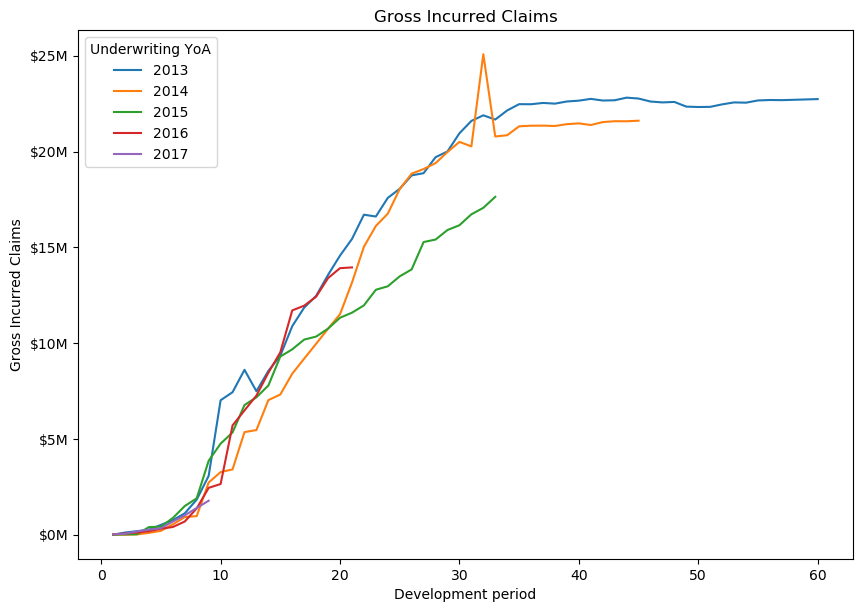

In [219]:
# remove the Totals column and row
table_gross_inc.drop('Grand Total', inplace=True, axis = 1)
table_gross_inc.drop('Grand Total', inplace=True, axis = 0)

#transpose the table so it plots the graph how we would like
ax = table_gross_inc.transpose().plot.line()

#change axis labels
ax.set(xlabel='Development period', ylabel='Gross Incurred Claims', title='Gross Incurred Claims')
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(yaxisFormatting))
plt.show()

# Gross Paid Claims
 
We will now do the same for the Gross Paid Claims

In [220]:
# create our dataframe 
gross_paid_piv= df[['Underwriting YoA','Processing Month','Gross Paid Claims']].copy()
gross_paid_piv['Development period'] = dev_period

# create our pivot table
table_gross_paid = pd.pivot_table(gross_paid_piv, values='Gross Paid Claims', index=['Underwriting YoA'],
                   columns=['Development period'],aggfunc= {"Gross Paid Claims":np.sum} ,margins = True, 
                    margins_name = 'Grand Total')

display(table_gross_paid)

Development period,1,2,3,4,5,6,7,8,9,10,...,50,51,52,53,54,55,56,57,60,Grand Total
Underwriting YoA,,,,,,,,,,,,,,,,,,,,,
2013,0.0,112500.0,124813.0,153152.0,199386.0,371695.0,558040.0,967848.0,1277353.0,2625446.0,...,21105841.0,21122431.0,21140731.0,21288996.0,21294942.0,21506043.0,21532392.0,21526132.0,21625972.0,782085737
2014,0.0,0.0,4663.0,41217.0,88016.0,358287.0,697917.0,773569.0,1088687.0,1477936.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,508331939
2015,1960.0,16208.0,23528.0,56876.0,313208.0,407098.0,625755.0,760768.0,1398401.0,2324353.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,235518350
2016,21443.0,29074.0,64746.0,95592.0,202753.0,293918.0,434659.0,932462.0,1486359.0,1615246.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77010594
2017,11655.0,28025.0,101185.0,136141.0,147393.0,384807.0,603797.0,855912.0,1269396.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6180449
Grand Total,35058.0,185807.0,318935.0,482978.0,950756.0,1815805.0,2920168.0,4290559.0,6520196.0,8042981.0,...,21105841.0,21122431.0,21140731.0,21288996.0,21294942.0,21506043.0,21532392.0,21526132.0,21625972.0,1609127069


## Displaying the graph

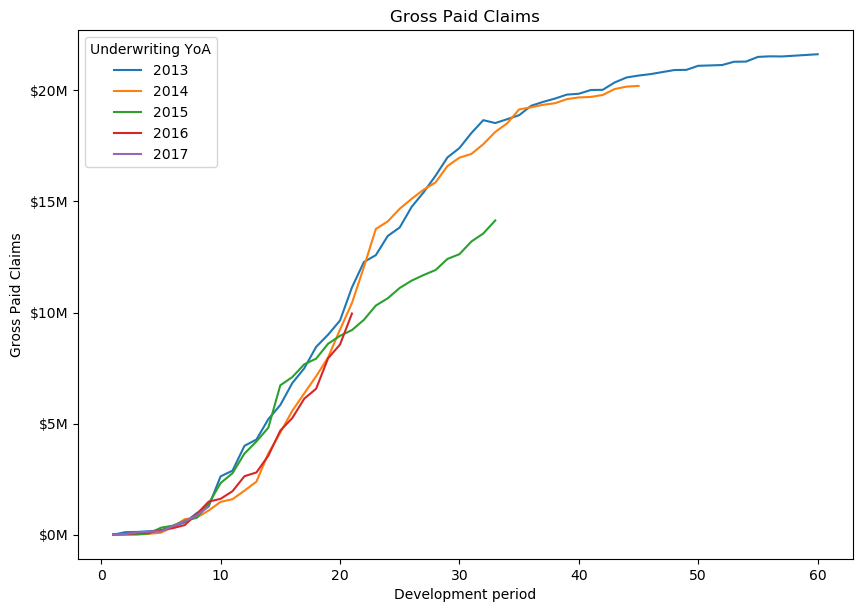

In [221]:
# remove the totals column and row 
table_gross_paid.drop('Grand Total', inplace=True, axis = 1)
table_gross_paid.drop('Grand Total', inplace=True, axis = 0)


# transpose the table so it plots the graph how we would like
ax = table_gross_paid.transpose().plot.line()

#change axis labels
ax.set(xlabel='Development period', ylabel='Gross Paid Claims', title='Gross Paid Claims')
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(yaxisFormatting))
plt.show()

# What to do if your data isn't cumulative

We have the file where the data is not cumulative: claims2.csv. In this section, we will adjust the data until it is.

In [222]:
df2 = pd.read_csv('claims2.csv')

df2.dropna(inplace = True, thresh = 2)
df2.replace(',','', regex = True, inplace=True)
#convert the Gross Premiums Received, Gross Paid Claims, Gross Incurred Claims columns to int
df2[['Gross Premiums Received', 'Gross Paid Claims', 'Gross Incurred Claims']] = df[['Gross Premiums Received', 
                                                                                     'Gross Paid Claims', 
                                                                                     'Gross Incurred Claims']].astype('int')

pd.set_option("display.max_rows", None)
display(df2)

,Underwriting YoA,Processing Month,Gross Premiums Received,Gross Paid Claims,Gross Incurred Claims
0,2013,201301,322983,0,0
1,2013,201302,5083516,112500,112500
2,2013,201303,8812441,124813,183023
3,2013,201304,12751060,153152,259558
4,2013,201305,13346743,199386,509828
5,2013,201306,15993573,371695,759277
6,2013,201307,17618810,558040,1115204
7,2013,201308,20333060,967848,1832746
8,2013,201309,22002371,1277353,3068456
9,2013,201310,23991350,2625446,7017086


You can make a column cumulative by using the function cumsum(). We want to be more specific and want each year to have an individual cumulative sum. We can achieve this by using the groupby() function.

In [223]:
# you can see what the groupby() function does by uncommenting the line below
#display(df2.groupby(['Underwriting YoA'])['Gross Premiums Received'].count())

df2['Gross Premiums Received'] = df2.groupby(['Underwriting YoA'])['Gross Premiums Received'].cumsum()
df2['Gross Paid Claims'] = df2.groupby(['Underwriting YoA'])['Gross Paid Claims'].cumsum()
df2['Gross Incurred Claims'] = df2.groupby(['Underwriting YoA'])['Gross Incurred Claims'].cumsum()
display(df2)

,Underwriting YoA,Processing Month,Gross Premiums Received,Gross Paid Claims,Gross Incurred Claims
0,2013,201301,322983,0,0
1,2013,201302,5406499,112500,112500
2,2013,201303,14218940,237313,295523
3,2013,201304,26970000,390465,555081
4,2013,201305,40316743,589851,1064909
5,2013,201306,56310316,961546,1824186
6,2013,201307,73929126,1519586,2939390
7,2013,201308,94262186,2487434,4772136
8,2013,201309,116264557,3764787,7840592
9,2013,201310,140255907,6390233,14857678
